# **UTS TEKNIK DATA MINING**
Intan Amelia Sari - 2019104596

Data Genap : https://drive.google.com/drive/folders/1VI_pSqLUTC1Gi3EuaH0vTMQzX7L7xx5i

Latar Belakang 
Data ini adalah data angka bunuh diri di berbagai negara, pada data ini terdapat 12 variabel sebagai berikut : 
- Country 
- Year
- Sex/Gender
- Age 
- Suicides_No = Angka bunuh diri
- Population = Angka populasi 
- Suicides/100k pop = persentase angka bunuh diri per 100ribu populasi
- Country year 
- HDI for year
- GDP for year = GDP per tahun
- GDP per capita = GDP per kapita
- Generation 

# Data Acquisition
Melakukan import library yang dibutuhkan untuk proses penelitian ini yang menggunakan bahasa pemograman Python 3.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

# Extract Raw Data from CSV
Melakukan ekstrak data dari data csv menjadi sebuah data frame.

### Menampilkan 5 data teratas

In [ ]:
df = pd.read_csv('master.csv', delimiter = ",");
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Menampilkan 5 data terbawah

In [ ]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


### Melihat tipe data dari setiap fitur.

In [ ]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

### Melihat total baris dan fitur.

In [ ]:
print("Total", df.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 27.820 baris dan 12 fitur dari data ini.")

Total (27820, 12)
Dari code diatas dapat diartikan bahwa data memiliki total 27.820 baris dan 12 fitur dari data ini.


# Data Preprocessing 

## Data Cleaning


### Menghilangkan Data Duplikat

In [ ]:
df.shape

(27820, 12)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


Pada data ini tidak ditemukan data duplikat sama sekali. sehingga proses ini sudah selesai

### Menghilangkan Missing Value 

In [ ]:
print(df.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

country               8364
year                  8364
sex                   8364
age                   8364
suicides_no           8364
population            8364
suicides/100k pop     8364
country-year          8364
HDI for year          8364
 gdp_for_year ($)     8364
gdp_per_capita ($)    8364
generation            8364
dtype: int64

In [ ]:
print(df.isnull().sum())   # After dropping the values

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [ ]:
df.shape

(8364, 12)

In [ ]:
print("Total", df.shape)
print("Dari code diatas dapat diartikan bahwa data memiliki total 8.364 baris dan 12 fitur dari data ini.")

Total (8364, 10)
Dari code diatas dapat diartikan bahwa data memiliki total 8.364 baris dan 12 fitur dari data ini.


## Data Selection

### Membuang Kolom yang Tidak Relevan

Dalam data ini saya membuang kolom HDI for year dan country-year.

In [ ]:
df = df.drop(columns = {"HDI for year", "country-year"}, axis = 1)

In [ ]:
df.shape

(8364, 10)

## Data Integration


### Mengubah Nama Fitur

In [ ]:
# Rename fitur
df = df.rename(columns={
    "sex": "gender"
    })
df.head(5)

,country,year,gender,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X


# Data Descriptive

### Five Number Summary 
Menampilkan Nilai Miniminum, Maksimum, Mean, Median, Q1, Q3

In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,8364.000000,8364.000000,8.364000e+03,8364.000000,8364.000000
mean,2005.348637,206.124342,1.852173e+06,11.991936,21074.371593
std,8.803020,681.004457,3.969754e+06,17.361772,22579.186968
min,1985.000000,0.000000,8.750000e+02,0.000000,313.000000
25%,2000.000000,3.000000,1.216425e+05,1.040000,4862.000000
50%,2010.000000,27.000000,4.722505e+05,5.720000,12584.000000
75%,2012.000000,127.250000,1.500290e+06,15.442500,30271.000000
max,2014.000000,11767.000000,4.350934e+07,187.060000,126352.000000


### Modus

In [ ]:
df.mode()

,country,year,gender,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,2010.0,female,15-24 years,0.0,22000.0,0.0,"1,057,801,282,051",996.0,Generation X
1,Austria,NaN,male,25-34 years,NaN,24000.0,NaN,"1,059,498,884",4096.0,NaN
2,Belgium,NaN,NaN,35-54 years,NaN,NaN,NaN,"1,065,826,670",4505.0,NaN
3,Brazil,NaN,NaN,5-14 years,NaN,NaN,NaN,"1,080,642,033",6662.0,NaN
4,Bulgaria,NaN,NaN,55-74 years,NaN,NaN,NaN,"1,093,169,389,205",8906.0,NaN
...,...,...,...,...,...,...,...,...,...,...
692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"97,891,090,929",NaN,NaN
693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"98,478,349,315",NaN,NaN
694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,697,566,668",NaN,NaN
695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,853,528,653",NaN,NaN


### Mean

In [ ]:
df.mean()

year                  2.005349e+03
suicides_no           2.061243e+02
population            1.852173e+06
suicides/100k pop     1.199194e+01
gdp_per_capita ($)    2.107437e+04
dtype: float64

### Median 

In [ ]:
df.median()

year                    2010.00
suicides_no               27.00
population            472250.50
suicides/100k pop          5.72
gdp_per_capita ($)     12584.00
dtype: float64

# Visualisasi 

In [ ]:
df.head()

,country,year,gender,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X


In [ ]:
# Define Function

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Histogram

### Bagaimana grafik tingkat bunuh diri per-tahun?

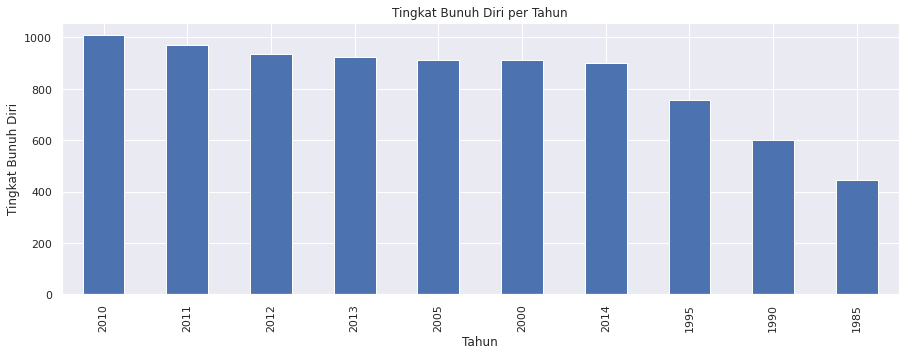

In [ ]:
df.year.value_counts().nlargest(50).plot(kind='bar', figsize=(15,5))
plt.title("Tingkat Bunuh Diri per Tahun")
plt.xlabel('Tahun')
plt.ylabel('Tingkat Bunuh Diri');

Dari histogram diatas dapat disimpulkan bahwa angka bunuh diri tertinggi berada ditahun 2010, sedangkan angka bunuh diri terkecil ada di tahun 1985

### Negara manakah yang paling banyak kasus bunuh dirinya? 

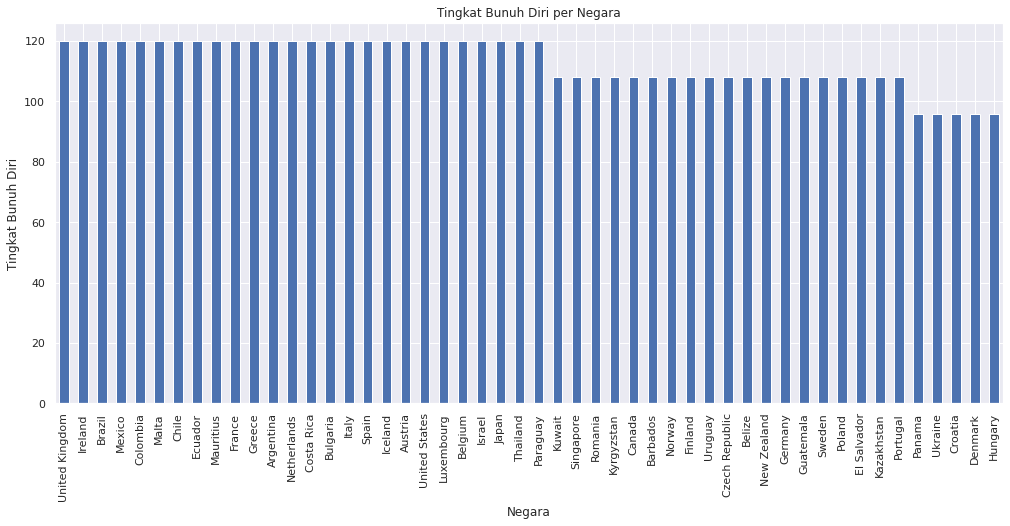

In [ ]:
df.country.value_counts().nlargest(50).plot(kind='bar', figsize=(17,7))
plt.title("Tingkat Bunuh Diri per Negara")
plt.xlabel('Negara')
plt.ylabel('Tingkat Bunuh Diri');

Dari histogram diatas, terdapat 3 tingkat angka bunuh diri. Tingkat 1 adalah negara yang memiliki angka bunuh diri tertinggi, tingkat 2 adalah negara dengan kasus bunuh diri kedua terbanyak, dan tingkat 3 negara dengan kasus bunuh diri yang lebih rendah. 

### Generasi manakah yang paling banyak melakukan aksi bunuh diri

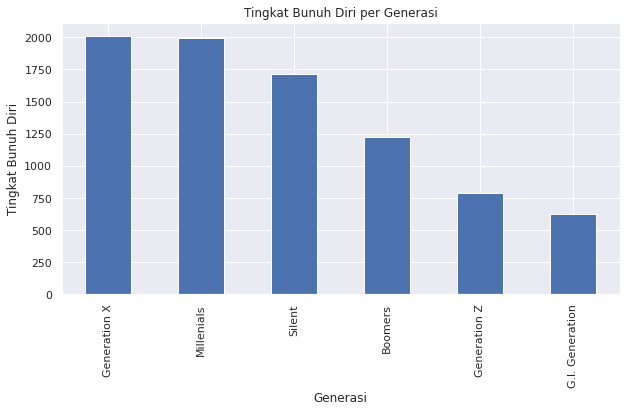

In [ ]:
df.generation.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Tingkat Bunuh Diri per Generasi")
plt.xlabel('Generasi')
plt.ylabel('Tingkat Bunuh Diri');

Generasi X atau yang lahir pada tahun 1965-1980 adalah generasi dengan kasus bunuh diri tertinggi, sedangkan G.I generation memiliki kasus bunuh diri terendah, pada saat generasi G.I sedang berlangsung perang dunia ke-2, sehingga angka kematian tertinggi bukan disebabkan oleh bunuh diri melainkan karena perang dunia

## Bar Plot

### Bagaimana perbandingan angka bunuh diri berdasarkan jenis kelamin? 

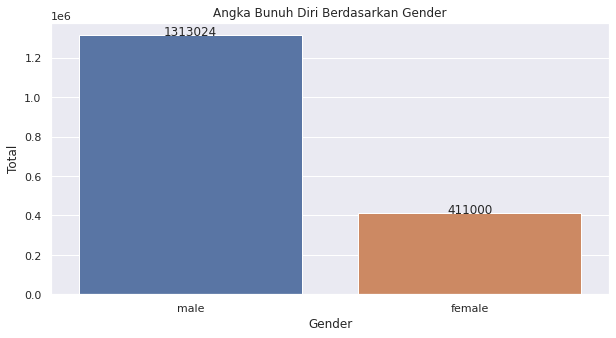

In [ ]:
datagender = df["gender"].unique()
data = []

for c in datagender:
    d = df[df["gender"] == c]
    Sum = d["suicides_no"].sum()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Gender", "Total"])

plt.figure(figsize=(10,5))
plt.title("Angka Bunuh Diri Berdasarkan Gender")

ax = sns.barplot(x="Gender", y="Total", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

Melihat dari data diatas, sudah terlihat jelas bahwa yang paling banyak melakukan bunuh diri adalah mereka yang berjenis kelamin laki-laki. Menurut penelitian, wanita lebih sering mengalami depresi namun wanita lebih bisa meluapkan emosinya dan lebih sering bercerita kepada orang lain. Wanita memiliki angka percobaan bunuh diri lebih besar dibanding laki-laki, namun cara laki-laki bunuh diri lebih ekstrim dibanding perempuan. oleh karena itu, tingkat bunuh diri laki-laki sangat tinggi, jika dibandingkan dengan wanita angka tersebut sangat signifikan bedanya. 

### Bagaimana tingkat bunuh diri berdasarkan Usia? 

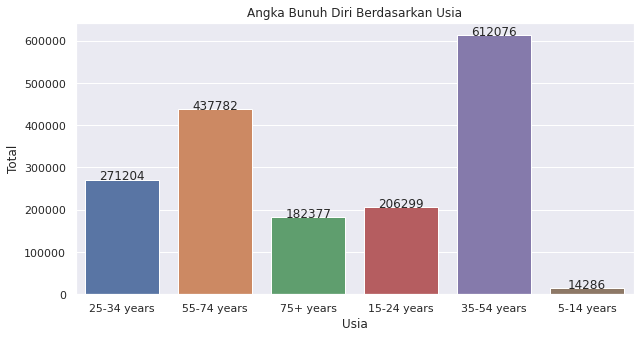

In [ ]:
dataage = df["age"].unique()
data = []

for c in dataage:
    d = df[df["age"] == c]
    Sum = d["suicides_no"].sum()
    data.append([c, Sum])
    
dt = pd.DataFrame(data, columns = ["Usia", "Total"])

plt.figure(figsize=(10,5))
plt.title("Angka Bunuh Diri Berdasarkan Usia")

ax = sns.barplot(x="Usia", y="Total", data=dt)
        
show_values_on_bars(ax, "v", 0.10)

Pada Bar Plot ini dapat disimpulkan bahwa rentang umur yang melakukan bunuh diri terbanyak adalah umur 35 - 54 Tahun dan rentang umur yang paling sedikit adalah umur 5 - 14 Tahun.

### Bagaimana tingkat bunuh diri per-generasi berdasarkan gender? 

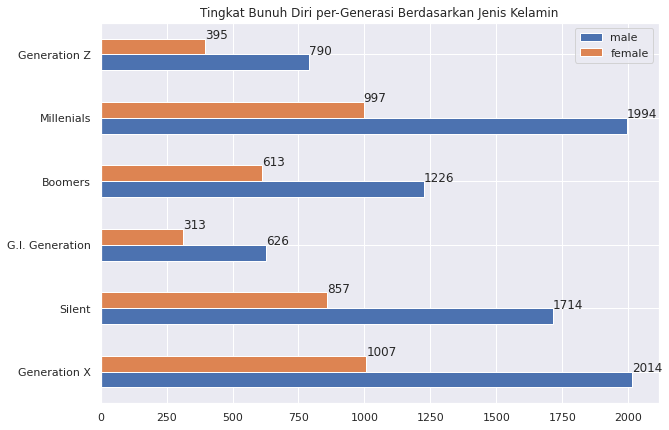

In [ ]:
datagen = df["generation"].unique()
data = []

for c in datagen:
    d = df[df["generation"] == c]
    gender_male = d["gender"].str.count("male").sum()
    gender_female = d["gender"].str.count("female").sum()
    data.append([c, gender_male, gender_female])

dt = pd.DataFrame(data, columns = ["gender", "male", "female"])
dtgen = []
dtmale = []
dtfemale = []

for h in dt["gender"]:
    dtgen.append(h)

for j in dt["male"]:
    dtmale.append(j)
    
for q in dt["female"]:
    dtfemale.append(q)


dts = pd.DataFrame({'male': dtmale, 'female': dtfemale}, index = dtgen)
ax = dts.plot.barh(figsize=(10,7), title="Tingkat Bunuh Diri per-Generasi Berdasarkan Jenis Kelamin")
        
show_values_on_bars(ax, "h", 0.10)

Dari data diatas, dapat disimpulkan bahwa angka bunuh diri tertinggi adalah generation x pada jenis kelamin laki-laki, disusul oleh generasi millenials dengan jenis kelamin laki-laki juga. 

## Box Plot

### Box Plot Year

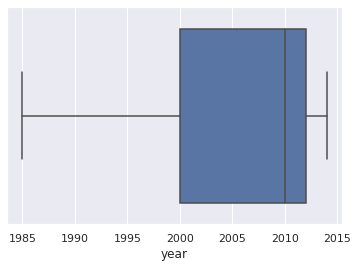

In [ ]:
sns.boxplot(x=df['year'])

### Boxplot Angka Bunuh Diri

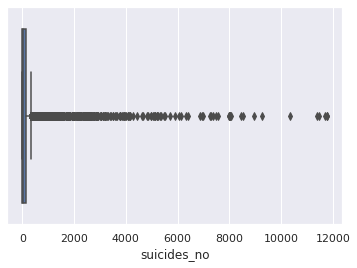

In [ ]:
sns.boxplot(x=df['suicides_no'])

### Box Plot Population

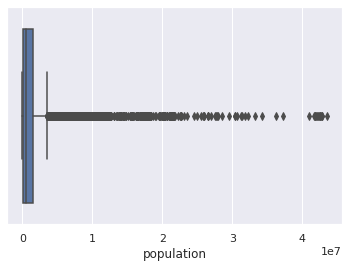

In [ ]:
sns.boxplot(x=df['population'])

### Box Plot Persentase Bunuh Diri per 100ribu populasi 

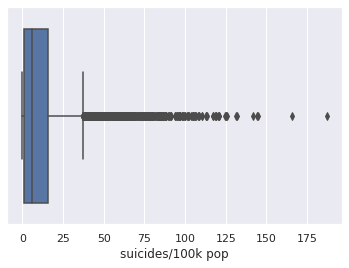

In [ ]:
sns.boxplot(x=df['suicides/100k pop'])

### Box Plot Angka GDP per Capita

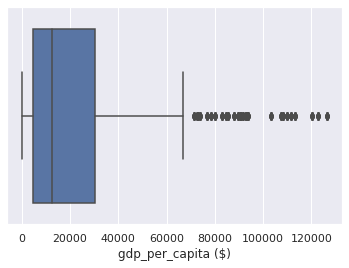

In [ ]:
sns.boxplot(x=df['gdp_per_capita ($)'])

## Scatter Plot

### Bagaimana korelasi antara jumlah populasi dengan angka bunuh diri? 

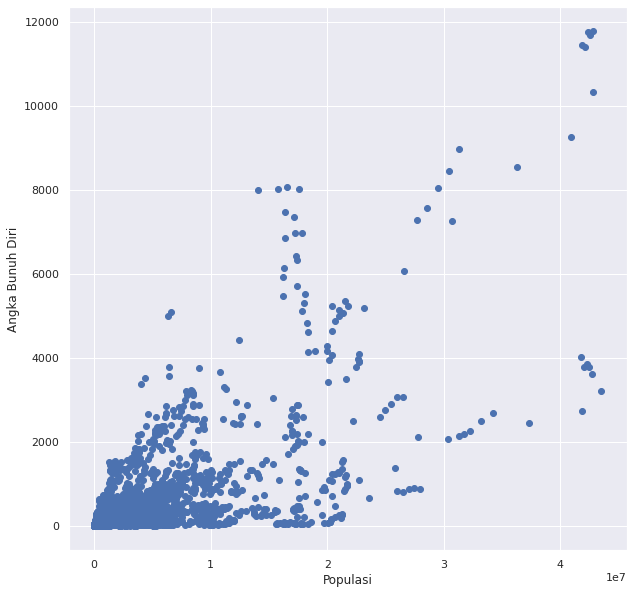

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df['population'], df['suicides_no'])
ax.set_xlabel('Populasi')
ax.set_ylabel('Angka Bunuh Diri')
plt.show()

Jumlah Populasi dengan angka bunuh diri memiliki hubungan atau korelasi positif yang artinya semakin banyak populasinya maka angka bunuh dirinya juga tinggi. begitu juga sebaliknya, jika jumlah populasinya sedikit maka angka bunuh dirinya juga lebih sedikit. 

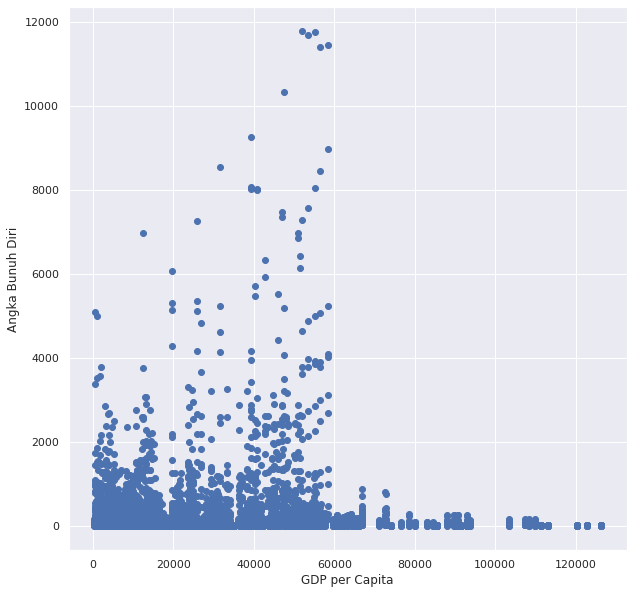

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df['gdp_per_capita ($)'], df['suicides_no'])
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Angka Bunuh Diri')
plt.show()

dari scatter plot diatas dapat disimpulkan bahwa angka GDP tidak memiliki korelasi dengan tinggi/rendahnya kasus bunuh diri disuatu negara.

# Pie Chart

### Perbandingan tingkat bunuh diri berdasarkan gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


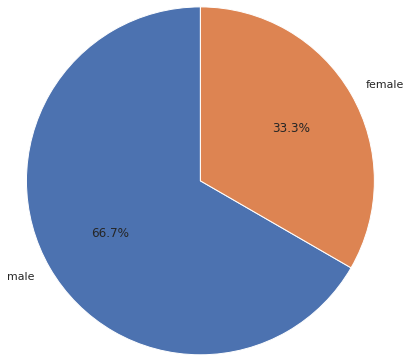

In [ ]:
datagender = df["gender"].unique()
data = [];

for s in datagender:
    tot = df["gender"].str.count(s).sum()
    data.append([s, tot])

data = pd.DataFrame(data, columns = ["Gender", "Total"])

value = data["Total"]
labels = data["Gender"]
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=2, startangle=90)
plt.axes().set_aspect("equal")
plt.show()

Laki-laki memiliki tingkat bunuh diri sebesar 66,7% sedangkan wnaita hanya 33,3%

### Perbandingan tingkat bunuh diri berdasarkan generasi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


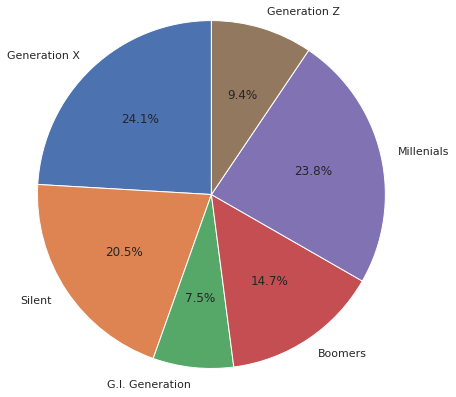

In [ ]:
datagen = df["generation"].unique()
data = [];

for s in datagen:
    tot = df["generation"].str.count(s).sum()
    data.append([s, tot])

data = pd.DataFrame(data, columns = ["Generation", "Total"])

value = data["Total"]
labels = data["Generation"]
plt.pie(value, labels = labels, autopct = "%1.1f%%", radius=2, startangle=90)
plt.axes().set_aspect("equal")
plt.show()

Generasi x adalah generasi yang memiliki tingkat bunuh diri tertinggi sebesar 24,1%, dilanjutkan oleh generaasi millenials sebesar 23,8%. Sedangkan generasi G.I adalah generasi yang memiliki tingkat bunuh diri terrendah. 

# Line Chart

In [ ]:
df.head()

,country,year,gender,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,"2,424,499,009",835,Generation X


### Pada tahun berapakah tingkat bunuh diri tertinggi?

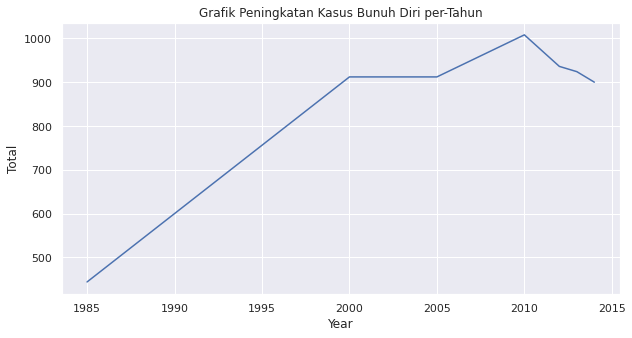

In [ ]:
datayear = df["year"].unique()
data = []

for c in datayear:
    d = df[df["year"] == c]
    counts = d["suicides_no"].count()
    data.append([c, counts])

data = pd.DataFrame(data, columns = ["Year", "Total"])
get = data.head(40)

plt.figure(figsize=(10,5))
plt.title("Grafik Peningkatan Kasus Bunuh Diri per-Tahun")
ax = sns.lineplot(x="Year", y="Total", data=get, sort=True)

Kasus bunuh diri mengalami peningkatan dari tahun ketahun hingga tahun 2010, setelah 2010 kasus bunuh diri menurun.

# Heat Map

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.024297,-0.012628,-0.077410,0.297888
suicides_no,-0.024297,1.000000,0.698758,0.237169,0.105182
population,-0.012628,0.698758,1.000000,-0.023197,0.073701
suicides/100k pop,-0.077410,0.237169,-0.023197,1.000000,-0.002339
gdp_per_capita ($),0.297888,0.105182,0.073701,-0.002339,1.000000


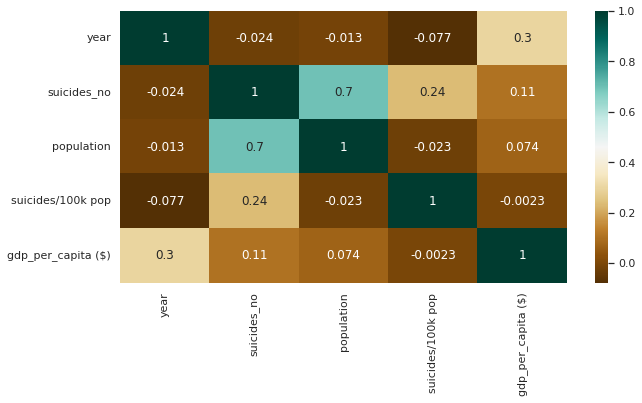

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c